In [14]:
from PIL import Image
import numpy as np

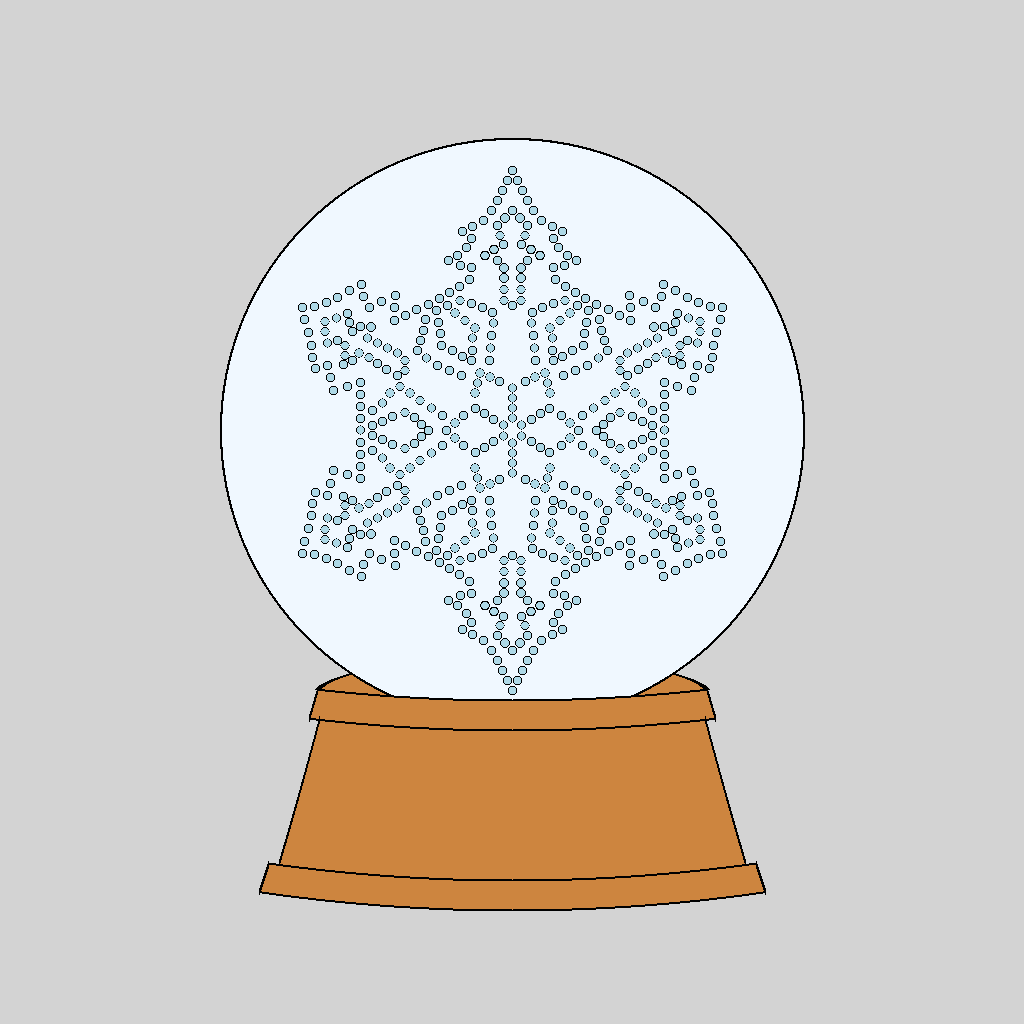

In [57]:
# Create a gray background 1024x1024 image
img_array = np.full((1024, 1024, 3), 211 , dtype = np.uint8)
y, x = np.indices(img_array.shape[:2])
thickness = 2500
wood_color = np.array([205, 133, 63])
ball_color = np.array([240, 248, 255])
snowflake_color = np.array([173, 216, 230])

def new_x(x):
  return (x - 512) * 2

def new_y(y):
  return (y - 430) * 2

# Structure part
Big_circle = new_x(x) ** 2 + new_y(y) ** 2 - 340000

row_line1 = (new_x(x) ** 2) * (1 / 7000) - 540 + new_y(y)
row_line2 = (new_x(x) ** 2) * (1 / 7000) - 600 + new_y(y)
row_line3 = (new_x(x) ** 2) * (1 / 7000) - 900 + new_y(y)
row_line4 = (new_x(x) ** 2) * (1 / 7000) - 960 + new_y(y)

straight_line1 = ((new_x(x) + 1250) ** 2) * (1 / 500) - 2000 + new_y(y)
straight_line2 = ((new_x(x) - 1250) ** 2) * (1 / 500) - 2000 + new_y(y)
straight_line3 = ((new_x(x) + 1140) ** 2) * (1 / 400) - 2000 + new_y(y)
straight_line4 = ((new_x(x) - 1140) ** 2) * (1 / 400) - 2000 + new_y(y)
straight_line5 = ((new_x(x) + 1240) ** 2) * (1 / 500) - 2000 + new_y(y)
straight_line6 = ((new_x(x) - 1240) ** 2) * (1 / 500) - 2000 + new_y(y)

curve1 = ((new_x(x) + 1287) ** 2) * (1 / 80) - ((new_y(y) - 527) ** 2) - 10000
curve2 = ((new_x(x) - 1287) ** 2) * (1 / 80) - ((new_y(y) - 527) ** 2) - 10000

# Draw the color structure
img_array[(row_line1 > 0) & (row_line2 < 0) & (straight_line1 > 0) & (straight_line2 > 0)] = wood_color
img_array[(row_line3 > 0) & (row_line4 < 0) & (straight_line5 > 0) & (straight_line6 > 0)] = wood_color
img_array[(row_line2 > 0) & (row_line3 < 0) & (straight_line3 > 0) & (straight_line4 > 0)] = wood_color
img_array[(Big_circle > 0) & (curve1 > 0) & (curve2 > 0)] = wood_color
img_array[(Big_circle < 0) & (row_line1 < 0)] = ball_color

img_array[(abs(Big_circle) < thickness) & (new_y(y) < 531.836)] = 0

img_array[(abs(row_line1) < 2) & (abs(new_x(x)) <= 389.3)] = 0
img_array[(abs(row_line2) < 2) & (abs(new_x(x)) <= 406.2)] = 0
img_array[(abs(row_line3) < 2) & (abs(new_x(x)) <= 486.5)] = 0
img_array[(abs(row_line4) < 2) & (abs(new_x(x)) <= 506)] = 0

img_array[(abs(straight_line1) < 7.5) & ((new_x(x) >= -406.3) & (new_x(x) <= -389.3))] = 0
img_array[(abs(straight_line3) < 7.5) & ((new_x(x) >= -467.35) & (new_x(x) <= -386))] = 0
img_array[(abs(straight_line5) < 7.5) & ((new_x(x) >= -506.3) & (new_x(x) <= -487))] = 0
img_array[(abs(straight_line2) < 7.5) & ((new_x(x) >= 389.3) & (new_x(x) <= 406.3))] = 0
img_array[(abs(straight_line4) < 7.5) & ((new_x(x) >= 386) & (new_x(x) <= 467.35))] = 0
img_array[(abs(straight_line6) < 7.5) & ((new_x(x) >= 487) & (new_x(x) <= 506.3))] = 0

img_array[(abs(curve1) < 150) & (new_y(y) < 518.3) & ((new_x(x) >= -420) & (new_x(x) <= -321.7))] = 0
img_array[(abs(curve2) < 150) & (new_y(y) < 518.3) & ((new_x(x) >= 321.7) & (new_x(x) <= 420))] = 0

#########################################################################################
#########################################################################################
# Snowflake part 1(snowflake outline), I draw each circle to make a snowflake
#########################################################################################
#########################################################################################
snow = (new_x(x) ** 2) + ((new_y(y) + 520) ** 2) - 60 # 1
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) - 520) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 10) ** 2) + ((new_y(y) + 500) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 10) ** 2) + ((new_y(y) - 500) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 10) ** 2) + ((new_y(y) + 500) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 10) ** 2) + ((new_y(y) - 500) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 20) ** 2) + ((new_y(y) + 480) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 20) ** 2) + ((new_y(y) - 480) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 20) ** 2) + ((new_y(y) + 480) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 20) ** 2) + ((new_y(y) - 480) ** 2) - 60 # 10
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 30) ** 2) + ((new_y(y) + 460) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 30) ** 2) + ((new_y(y) - 460) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 30) ** 2) + ((new_y(y) + 460) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 30) ** 2) + ((new_y(y) - 460) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 42) ** 2) + ((new_y(y) + 440) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 42) ** 2) + ((new_y(y) - 440) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 42) ** 2) + ((new_y(y) + 440) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 42) ** 2) + ((new_y(y) - 440) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 58) ** 2) + ((new_y(y) + 420) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 58) ** 2) + ((new_y(y) - 420) ** 2) - 60 # 20
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 58) ** 2) + ((new_y(y) + 420) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 58) ** 2) + ((new_y(y) - 420) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 80) ** 2) + ((new_y(y) + 408) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 80) ** 2) + ((new_y(y) - 408) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 80) ** 2) + ((new_y(y) + 408) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 80) ** 2) + ((new_y(y) - 408) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 100) ** 2) + ((new_y(y) + 398) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 100) ** 2) + ((new_y(y) - 398) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 100) ** 2) + ((new_y(y) + 398) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 100) ** 2) + ((new_y(y) - 398) ** 2) - 60 # 30
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) + 384) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) - 384) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) + 384) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) - 384) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 92) ** 2) + ((new_y(y) + 366) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 92) ** 2) + ((new_y(y) - 366) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 92) ** 2) + ((new_y(y) + 366) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 92) ** 2) + ((new_y(y) - 366) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 110) ** 2) + ((new_y(y) + 350) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 110) ** 2) + ((new_y(y) - 350) ** 2) - 60 # 40
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 110) ** 2) + ((new_y(y) + 350) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 110) ** 2) + ((new_y(y) - 350) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 128) ** 2) + ((new_y(y) + 340) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 128) ** 2) + ((new_y(y) - 340) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 128) ** 2) + ((new_y(y) + 340) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 128) ** 2) + ((new_y(y) - 340) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 104) ** 2) + ((new_y(y) + 330) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 104) ** 2) + ((new_y(y) - 330) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 104) ** 2) + ((new_y(y) + 330) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 104) ** 2) + ((new_y(y) - 330) ** 2) - 60 # 50
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) + 326) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) - 326) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) + 326) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) - 326) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 86) ** 2) + ((new_y(y) + 302) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 86) ** 2) + ((new_y(y) - 302) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 86) ** 2) + ((new_y(y) + 302) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 86) ** 2) + ((new_y(y) - 302) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 106) ** 2) + ((new_y(y) + 288) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 106) ** 2) + ((new_y(y) - 288) ** 2) - 60 # 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 106) ** 2) + ((new_y(y) + 288) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 106) ** 2) + ((new_y(y) - 288) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 126) ** 2) + ((new_y(y) + 276) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 126) ** 2) + ((new_y(y) - 276) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 126) ** 2) + ((new_y(y) + 276) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 126) ** 2) + ((new_y(y) - 276) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 146) ** 2) + ((new_y(y) + 264) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 146) ** 2) + ((new_y(y) - 264) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 146) ** 2) + ((new_y(y) + 264) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 146) ** 2) + ((new_y(y) - 264) ** 2) - 60 # 70
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 168) ** 2) + ((new_y(y) + 252) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 168) ** 2) + ((new_y(y) - 252) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 168) ** 2) + ((new_y(y) + 252) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 168) ** 2) + ((new_y(y) - 252) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 192) ** 2) + ((new_y(y) + 242) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 192) ** 2) + ((new_y(y) - 242) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 192) ** 2) + ((new_y(y) + 242) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 192) ** 2) + ((new_y(y) - 242) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 214) ** 2) + ((new_y(y) + 230) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 214) ** 2) + ((new_y(y) - 230) ** 2) - 60 # 80
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 214) ** 2) + ((new_y(y) + 230) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 214) ** 2) + ((new_y(y) - 230) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 236) ** 2) + ((new_y(y) + 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 236) ** 2) + ((new_y(y) - 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 236) ** 2) + ((new_y(y) + 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 236) ** 2) + ((new_y(y) - 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 236) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 236) ** 2) + ((new_y(y) - 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 236) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 236) ** 2) + ((new_y(y) - 246) ** 2) - 60 # 90
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 234) ** 2) + ((new_y(y) + 270) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 234) ** 2) + ((new_y(y) - 270) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 234) ** 2) + ((new_y(y) + 270) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 234) ** 2) + ((new_y(y) - 270) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 262) ** 2) + ((new_y(y) + 258) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 262) ** 2) + ((new_y(y) - 258) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 262) ** 2) + ((new_y(y) + 258) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 262) ** 2) + ((new_y(y) - 258) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 286) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 286) ** 2) + ((new_y(y) - 246) ** 2) - 60 # 100
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 286) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 286) ** 2) + ((new_y(y) - 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 298) ** 2) + ((new_y(y) + 268) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 298) ** 2) + ((new_y(y) - 268) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 298) ** 2) + ((new_y(y) + 268) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 298) ** 2) + ((new_y(y) - 268) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 302) ** 2) + ((new_y(y) + 292) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 302) ** 2) + ((new_y(y) - 292) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 302) ** 2) + ((new_y(y) + 292) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 302) ** 2) + ((new_y(y) - 292) ** 2) - 60 # 110
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 326) ** 2) + ((new_y(y) + 280) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 326) ** 2) + ((new_y(y) - 280) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 326) ** 2) + ((new_y(y) + 280) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 326) ** 2) + ((new_y(y) - 280) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 350) ** 2) + ((new_y(y) + 266) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 350) ** 2) + ((new_y(y) - 266) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 350) ** 2) + ((new_y(y) + 266) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 350) ** 2) + ((new_y(y) - 266) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 372) ** 2) + ((new_y(y) + 256) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 372) ** 2) + ((new_y(y) - 256) ** 2) - 60 # 120
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 372) ** 2) + ((new_y(y) + 256) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 372) ** 2) + ((new_y(y) - 256) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 396) ** 2) + ((new_y(y) + 248) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 396) ** 2) + ((new_y(y) - 248) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 396) ** 2) + ((new_y(y) + 248) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 396) ** 2) + ((new_y(y) - 248) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 420) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 420) ** 2) + ((new_y(y) - 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 420) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 420) ** 2) + ((new_y(y) - 246) ** 2) - 60 # 130
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 416) ** 2) + ((new_y(y) + 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 416) ** 2) + ((new_y(y) - 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 416) ** 2) + ((new_y(y) + 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 416) ** 2) + ((new_y(y) - 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 408) ** 2) + ((new_y(y) + 196) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 408) ** 2) + ((new_y(y) - 196) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 408) ** 2) + ((new_y(y) + 196) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 408) ** 2) + ((new_y(y) - 196) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 402) ** 2) + ((new_y(y) + 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 402) ** 2) + ((new_y(y) - 170) ** 2) - 60 # 140
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 402) ** 2) + ((new_y(y) + 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 402) ** 2) + ((new_y(y) - 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 400) ** 2) + ((new_y(y) + 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 400) ** 2) + ((new_y(y) - 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 400) ** 2) + ((new_y(y) + 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 400) ** 2) + ((new_y(y) - 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 394) ** 2) + ((new_y(y) + 124) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 394) ** 2) + ((new_y(y) - 124) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 394) ** 2) + ((new_y(y) + 124) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 394) ** 2) + ((new_y(y) - 124) ** 2) - 60 # 150
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 370) ** 2) + ((new_y(y) + 130) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 370) ** 2) + ((new_y(y) - 130) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 370) ** 2) + ((new_y(y) + 130) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 370) ** 2) + ((new_y(y) - 130) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 364) ** 2) + ((new_y(y) + 106) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 364) ** 2) + ((new_y(y) - 106) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 364) ** 2) + ((new_y(y) + 106) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 364) ** 2) + ((new_y(y) - 106) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 358) ** 2) + ((new_y(y) + 80) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 358) ** 2) + ((new_y(y) - 80) ** 2) - 60 # 160
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 358) ** 2) + ((new_y(y) + 80) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 358) ** 2) + ((new_y(y) - 80) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 330) ** 2) + ((new_y(y) + 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 330) ** 2) + ((new_y(y) - 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 330) ** 2) + ((new_y(y) + 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 330) ** 2) + ((new_y(y) - 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) + 96) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) - 96) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) + 96) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) - 96) ** 2) - 60 # 170
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) + 72) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) - 72) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) + 72) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) - 72) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) + 48) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) - 48) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) + 48) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) - 48) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) + 24) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) - 24) ** 2) - 60 # 180
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) + 24) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) - 24) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) + 1) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) + 1) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

################################################################################
################################################################################
# Snowflake part 2(outer snowflake) #######################################
################################################################################
################################################################################
snow = (new_x(x) ** 2) + ((new_y(y) + 440) ** 2) - 60 # 1
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) - 440) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 15) ** 2) + ((new_y(y) + 425) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 15) ** 2) + ((new_y(y) - 425) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 15) ** 2) + ((new_y(y) + 425) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 15) ** 2) + ((new_y(y) - 425) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 30) ** 2) + ((new_y(y) + 410) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 30) ** 2) + ((new_y(y) - 410) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 30) ** 2) + ((new_y(y) + 410) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 30) ** 2) + ((new_y(y) - 410) ** 2) - 60 # 10
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 25) ** 2) + ((new_y(y) + 390) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 25) ** 2) + ((new_y(y) - 390) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 25) ** 2) + ((new_y(y) + 390) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 25) ** 2) + ((new_y(y) - 390) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 18) ** 2) + ((new_y(y) + 372) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 18) ** 2) + ((new_y(y) - 372) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 18) ** 2) + ((new_y(y) + 372) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 18) ** 2) + ((new_y(y) - 372) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 37) ** 2) + ((new_y(y) + 362) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 37) ** 2) + ((new_y(y) - 362) ** 2) - 60 # 20
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 37) ** 2) + ((new_y(y) + 362) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 37) ** 2) + ((new_y(y) - 362) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 55) ** 2) + ((new_y(y) + 350) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 55) ** 2) + ((new_y(y) - 350) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 55) ** 2) + ((new_y(y) + 350) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 55) ** 2) + ((new_y(y) - 350) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 30) ** 2) + ((new_y(y) + 340) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 30) ** 2) + ((new_y(y) - 340) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 30) ** 2) + ((new_y(y) + 340) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 30) ** 2) + ((new_y(y) - 340) ** 2) - 60 # 30
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) + 325) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) - 325) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) + 325) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) - 325) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) + 305) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) - 305) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) + 305) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) - 305) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) + 282) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) - 282) ** 2) - 60 # 40
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) + 282) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) - 282) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) + 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) - 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 17) ** 2) + ((new_y(y) + 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 17) ** 2) + ((new_y(y) - 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) - 250) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) + 250) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 215) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 215) ** 2) + ((new_y(y) - 140) ** 2) - 60 # 50
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 215) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 215) ** 2) + ((new_y(y) - 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 215) ** 2) + ((new_y(y) + 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 215) ** 2) + ((new_y(y) - 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 215) ** 2) + ((new_y(y) + 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 215) ** 2) + ((new_y(y) - 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 230) ** 2) + ((new_y(y) + 110) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 230) ** 2) + ((new_y(y) - 110) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 230) ** 2) + ((new_y(y) + 110) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 230) ** 2) + ((new_y(y) - 110) ** 2) - 60 # 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 230) ** 2) + ((new_y(y) + 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 230) ** 2) + ((new_y(y) - 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 230) ** 2) + ((new_y(y) + 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 230) ** 2) + ((new_y(y) - 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 250) ** 2) + ((new_y(y) + 165) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 250) ** 2) + ((new_y(y) - 165) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 250) ** 2) + ((new_y(y) + 165) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 250) ** 2) + ((new_y(y) - 165) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 270) ** 2) + ((new_y(y) + 175) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 270) ** 2) + ((new_y(y) - 175) ** 2) - 60 # 70
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 270) ** 2) + ((new_y(y) + 175) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 270) ** 2) + ((new_y(y) - 175) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 290) ** 2) + ((new_y(y) + 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 290) ** 2) + ((new_y(y) - 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 290) ** 2) + ((new_y(y) + 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 290) ** 2) + ((new_y(y) - 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 283) ** 2) + ((new_y(y) + 207) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 283) ** 2) + ((new_y(y) - 207) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 283) ** 2) + ((new_y(y) + 207) ** 2) - 60
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 283) ** 2) + ((new_y(y) - 207) ** 2) - 60 # 80
img_array[abs(snow) < 35] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) + 208) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) - 208) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 304) ** 2) + ((new_y(y) + 208) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 304) ** 2) + ((new_y(y) - 208) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 320) ** 2) + ((new_y(y) + 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 320) ** 2) + ((new_y(y) - 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 320) ** 2) + ((new_y(y) + 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 320) ** 2) + ((new_y(y) - 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 326) ** 2) + ((new_y(y) + 216) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 326) ** 2) + ((new_y(y) - 216) ** 2) - 60 # 90
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 326) ** 2) + ((new_y(y) + 216) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 326) ** 2) + ((new_y(y) - 216) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 330) ** 2) + ((new_y(y) + 234) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 330) ** 2) + ((new_y(y) - 234) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 330) ** 2) + ((new_y(y) + 234) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 330) ** 2) + ((new_y(y) - 234) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 352) ** 2) + ((new_y(y) + 225) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 352) ** 2) + ((new_y(y) - 225) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 352) ** 2) + ((new_y(y) + 225) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 352) ** 2) + ((new_y(y) - 225) ** 2) - 60 # 100
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 375) ** 2) + ((new_y(y) + 218) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 375) ** 2) + ((new_y(y) - 218) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 375) ** 2) + ((new_y(y) + 218) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 375) ** 2) + ((new_y(y) - 218) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 375) ** 2) + ((new_y(y) + 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 375) ** 2) + ((new_y(y) - 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 375) ** 2) + ((new_y(y) + 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 375) ** 2) + ((new_y(y) - 198) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 370) ** 2) + ((new_y(y) + 175) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 370) ** 2) + ((new_y(y) - 175) ** 2) - 60 # 110
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 370) ** 2) + ((new_y(y) + 175) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 370) ** 2) + ((new_y(y) - 175) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 350) ** 2) + ((new_y(y) + 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 350) ** 2) + ((new_y(y) - 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 350) ** 2) + ((new_y(y) + 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 350) ** 2) + ((new_y(y) - 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 335) ** 2) + ((new_y(y) + 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 335) ** 2) + ((new_y(y) - 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 335) ** 2) + ((new_y(y) + 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 335) ** 2) + ((new_y(y) - 170) ** 2) - 60 # 120
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 335) ** 2) + ((new_y(y) + 150) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 335) ** 2) + ((new_y(y) - 150) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 335) ** 2) + ((new_y(y) + 150) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 335) ** 2) + ((new_y(y) - 150) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 338) ** 2) + ((new_y(y) + 132) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 338) ** 2) + ((new_y(y) - 132) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 338) ** 2) + ((new_y(y) + 132) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 338) ** 2) + ((new_y(y) - 132) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 320) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 320) ** 2) + ((new_y(y) - 140) ** 2) - 60 # 130
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 320) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 320) ** 2) + ((new_y(y) - 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 307) ** 2) + ((new_y(y) + 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 307) ** 2) + ((new_y(y) - 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 307) ** 2) + ((new_y(y) + 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 307) ** 2) + ((new_y(y) - 155) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 287) ** 2) + ((new_y(y) + 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 287) ** 2) + ((new_y(y) - 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 287) ** 2) + ((new_y(y) + 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 287) ** 2) + ((new_y(y) - 146) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 270) ** 2) + ((new_y(y) + 134) ** 2) - 60 # 140
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 270) ** 2) + ((new_y(y) - 134) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 270) ** 2) + ((new_y(y) + 134) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 270) ** 2) + ((new_y(y) - 134) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 252) ** 2) + ((new_y(y) + 122) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 252) ** 2) + ((new_y(y) - 122) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 252) ** 2) + ((new_y(y) + 122) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 252) ** 2) + ((new_y(y) - 122) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

################################################################################
################################################################################
# Snowflake part 3(inner snowflake) #######################################
################################################################################
################################################################################
snow = ((new_x(x) - 18) ** 2) + ((new_y(y) + 11) ** 2) - 60 # 1
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 18) ** 2) + ((new_y(y) - 11) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 18) ** 2) + ((new_y(y) + 11) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 18) ** 2) + ((new_y(y) - 11) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) - 25) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) + 25) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) - 45) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) + 45) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) - 65) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) + 65) ** 2) - 60 # 10
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) - 85) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = (new_x(x) ** 2) + ((new_y(y) + 85) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 38) ** 2) + ((new_y(y) + 22) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 38) ** 2) + ((new_y(y) - 22) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 38) ** 2) + ((new_y(y) + 22) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 38) ** 2) + ((new_y(y) - 22) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 56) ** 2) + ((new_y(y) + 34) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 56) ** 2) + ((new_y(y) - 34) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 56) ** 2) + ((new_y(y) + 34) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 56) ** 2) + ((new_y(y) - 34) ** 2) - 60 # 20
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 74) ** 2) + ((new_y(y) + 44) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 74) ** 2) + ((new_y(y) - 44) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 74) ** 2) + ((new_y(y) + 44) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 74) ** 2) + ((new_y(y) - 44) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 65) ** 2) + ((new_y(y) + 115) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 65) ** 2) + ((new_y(y) - 115) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 65) ** 2) + ((new_y(y) + 115) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 65) ** 2) + ((new_y(y) - 115) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 70) ** 2) + ((new_y(y) + 95) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 70) ** 2) + ((new_y(y) - 95) ** 2) - 60 # 30
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 70) ** 2) + ((new_y(y) + 95) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 70) ** 2) + ((new_y(y) - 95) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 75) ** 2) + ((new_y(y) + 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 75) ** 2) + ((new_y(y) - 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 75) ** 2) + ((new_y(y) + 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 75) ** 2) + ((new_y(y) - 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 45) ** 2) + ((new_y(y) + 107) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 45) ** 2) + ((new_y(y) - 107) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 45) ** 2) + ((new_y(y) + 107) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 45) ** 2) + ((new_y(y) - 107) ** 2) - 60 # 40
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 26) ** 2) + ((new_y(y) + 98) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 26) ** 2) + ((new_y(y) - 98) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 26) ** 2) + ((new_y(y) + 98) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 26) ** 2) + ((new_y(y) - 98) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 98) ** 2) + ((new_y(y) + 30) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 98) ** 2) + ((new_y(y) - 30) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 98) ** 2) + ((new_y(y) + 30) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 98) ** 2) + ((new_y(y) - 30) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 115) ** 2) + ((new_y(y) + 15) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 115) ** 2) + ((new_y(y) - 15) ** 2) - 60 # 50
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 115) ** 2) + ((new_y(y) + 15) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 115) ** 2) + ((new_y(y) - 15) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 132) ** 2) + (new_y(y) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 132) ** 2) + (new_y(y) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 130) ** 2) + ((new_y(y) + 250) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 130) ** 2) + ((new_y(y) - 250) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 130) ** 2) + ((new_y(y) + 250) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 130) ** 2) + ((new_y(y) - 250) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 115) ** 2) + ((new_y(y) + 235) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 115) ** 2) + ((new_y(y) - 235) ** 2) - 60 # 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 115) ** 2) + ((new_y(y) + 235) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 115) ** 2) + ((new_y(y) - 235) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 95) ** 2) + ((new_y(y) + 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 95) ** 2) + ((new_y(y) - 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 95) ** 2) + ((new_y(y) + 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 95) ** 2) + ((new_y(y) - 220) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 75) ** 2) + ((new_y(y) + 205) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 75) ** 2) + ((new_y(y) - 205) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 75) ** 2) + ((new_y(y) + 205) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 75) ** 2) + ((new_y(y) - 205) ** 2) - 60 # 70
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 80) ** 2) + ((new_y(y) + 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 80) ** 2) + ((new_y(y) - 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 80) ** 2) + ((new_y(y) + 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 80) ** 2) + ((new_y(y) - 185) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 80) ** 2) + ((new_y(y) + 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 80) ** 2) + ((new_y(y) - 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 80) ** 2) + ((new_y(y) + 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 80) ** 2) + ((new_y(y) - 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) - 140) ** 2) - 60 # 80
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) - 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 100) ** 2) + ((new_y(y) + 148) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 100) ** 2) + ((new_y(y) - 148) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 100) ** 2) + ((new_y(y) + 148) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 100) ** 2) + ((new_y(y) - 148) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 120) ** 2) + ((new_y(y) + 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 120) ** 2) + ((new_y(y) - 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 120) ** 2) + ((new_y(y) + 160) ** 2) - 60 # 90
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 120) ** 2) + ((new_y(y) - 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 142) ** 2) + ((new_y(y) + 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 142) ** 2) + ((new_y(y) - 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 142) ** 2) + ((new_y(y) + 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 142) ** 2) + ((new_y(y) - 170) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 144) ** 2) + ((new_y(y) + 194) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 144) ** 2) + ((new_y(y) - 194) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 144) ** 2) + ((new_y(y) + 194) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 144) ** 2) + ((new_y(y) - 194) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 148) ** 2) + ((new_y(y) + 216) ** 2) - 60 # 100
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 148) ** 2) + ((new_y(y) - 216) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 148) ** 2) + ((new_y(y) + 216) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 148) ** 2) + ((new_y(y) - 216) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 152) ** 2) + ((new_y(y) + 240) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 152) ** 2) + ((new_y(y) - 240) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 152) ** 2) + ((new_y(y) + 240) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 152) ** 2) + ((new_y(y) - 240) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 168) ** 2) + (new_y(y) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 168) ** 2) + (new_y(y) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 182) ** 2) + ((new_y(y) + 12) ** 2) - 60 # 110
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 182) ** 2) + ((new_y(y) - 12) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 182) ** 2) + ((new_y(y) + 12) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 182) ** 2) + ((new_y(y) - 12) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 196) ** 2) + ((new_y(y) + 26) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 196) ** 2) + ((new_y(y) - 26) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 196) ** 2) + ((new_y(y) + 26) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 196) ** 2) + ((new_y(y) - 26) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 215) ** 2) + ((new_y(y) + 36) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 215) ** 2) + ((new_y(y) - 36) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 215) ** 2) + ((new_y(y) + 36) ** 2) - 60 # 120
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 215) ** 2) + ((new_y(y) - 36) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 240) ** 2) + ((new_y(y) + 28) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 240) ** 2) + ((new_y(y) - 28) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 240) ** 2) + ((new_y(y) + 28) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 240) ** 2) + ((new_y(y) - 28) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 260) ** 2) + ((new_y(y) + 18) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 260) ** 2) + ((new_y(y) - 18) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 260) ** 2) + ((new_y(y) + 18) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 260) ** 2) + ((new_y(y) - 18) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 280) ** 2) + ((new_y(y) + 10) ** 2) - 60 # 130
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 280) ** 2) + ((new_y(y) - 10) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 280) ** 2) + ((new_y(y) + 10) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 280) ** 2) + ((new_y(y) - 10) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 152) ** 2) + ((new_y(y) - 240) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 105) ** 2) + ((new_y(y) + 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 105) ** 2) + ((new_y(y) - 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 105) ** 2) + ((new_y(y) + 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 105) ** 2) + ((new_y(y) - 260) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) + 254) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) - 254) ** 2) - 60 # 140
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 82) ** 2) + ((new_y(y) + 254) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 82) ** 2) + ((new_y(y) - 254) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 60) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 60) ** 2) + ((new_y(y) - 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 60) ** 2) + ((new_y(y) + 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 60) ** 2) + ((new_y(y) - 246) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 40) ** 2) + ((new_y(y) + 236) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 40) ** 2) + ((new_y(y) - 236) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 40) ** 2) + ((new_y(y) + 236) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 40) ** 2) + ((new_y(y) - 236) ** 2) - 60 # 150
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 38) ** 2) + ((new_y(y) + 215) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 38) ** 2) + ((new_y(y) - 215) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 38) ** 2) + ((new_y(y) + 215) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 38) ** 2) + ((new_y(y) - 215) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 42) ** 2) + ((new_y(y) + 190) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 42) ** 2) + ((new_y(y) - 190) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 42) ** 2) + ((new_y(y) + 190) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 42) ** 2) + ((new_y(y) - 190) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 44) ** 2) + ((new_y(y) + 165) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 44) ** 2) + ((new_y(y) - 165) ** 2) - 60 # 160
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 44) ** 2) + ((new_y(y) + 165) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 44) ** 2) + ((new_y(y) - 165) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 46) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 46) ** 2) + ((new_y(y) - 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 46) ** 2) + ((new_y(y) + 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 46) ** 2) + ((new_y(y) - 140) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 40) ** 2) + ((new_y(y) + 236) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 174) ** 2) + ((new_y(y) + 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 178) ** 2) + ((new_y(y) + 200) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 178) ** 2) + ((new_y(y) - 200) ** 2) - 60 # 170
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 178) ** 2) + ((new_y(y) + 200) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 178) ** 2) + ((new_y(y) - 200) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 184) ** 2) + ((new_y(y) + 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 184) ** 2) + ((new_y(y) - 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 184) ** 2) + ((new_y(y) + 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 184) ** 2) + ((new_y(y) - 180) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 174) ** 2) + ((new_y(y) + 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 174) ** 2) + ((new_y(y) - 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 174) ** 2) + ((new_y(y) + 222) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 174) ** 2) + ((new_y(y) - 222) ** 2) - 60 # 180
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 190) ** 2) + ((new_y(y) + 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 190) ** 2) + ((new_y(y) - 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 190) ** 2) + ((new_y(y) + 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 190) ** 2) + ((new_y(y) - 160) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 172) ** 2) + ((new_y(y) + 145) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 172) ** 2) + ((new_y(y) - 145) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 172) ** 2) + ((new_y(y) + 145) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 172) ** 2) + ((new_y(y) - 145) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 150) ** 2) + ((new_y(y) + 130) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 150) ** 2) + ((new_y(y) - 130) ** 2) - 60 # 190
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 150) ** 2) + ((new_y(y) + 130) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 150) ** 2) + ((new_y(y) - 130) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 126) ** 2) + ((new_y(y) + 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 126) ** 2) + ((new_y(y) - 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 126) ** 2) + ((new_y(y) + 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 126) ** 2) + ((new_y(y) - 120) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 102) ** 2) + ((new_y(y) + 110) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 102) ** 2) + ((new_y(y) - 110) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 102) ** 2) + ((new_y(y) + 110) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 102) ** 2) + ((new_y(y) - 110) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 280) ** 2) + ((new_y(y) + 40) ** 2) - 60 # 200
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 280) ** 2) + ((new_y(y) - 40) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 280) ** 2) + ((new_y(y) + 40) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 280) ** 2) + ((new_y(y) - 40) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 260) ** 2) + ((new_y(y) + 55) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 260) ** 2) + ((new_y(y) - 55) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 260) ** 2) + ((new_y(y) + 55) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 260) ** 2) + ((new_y(y) - 55) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 245) ** 2) + ((new_y(y) + 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 245) ** 2) + ((new_y(y) - 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 245) ** 2) + ((new_y(y) + 75) ** 2) - 60 # 210
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 245) ** 2) + ((new_y(y) - 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 225) ** 2) + ((new_y(y) + 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 225) ** 2) + ((new_y(y) - 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 225) ** 2) + ((new_y(y) + 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 225) ** 2) + ((new_y(y) - 88) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 205) ** 2) + ((new_y(y) + 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 205) ** 2) + ((new_y(y) - 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 205) ** 2) + ((new_y(y) + 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 205) ** 2) + ((new_y(y) - 75) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 185) ** 2) + ((new_y(y) + 60) ** 2) - 60 # 220
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 185) ** 2) + ((new_y(y) - 60) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 185) ** 2) + ((new_y(y) + 60) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 185) ** 2) + ((new_y(y) - 60) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 162) ** 2) + ((new_y(y) + 45) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 162) ** 2) + ((new_y(y) - 45) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 162) ** 2) + ((new_y(y) + 45) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 162) ** 2) + ((new_y(y) - 45) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 140) ** 2) + ((new_y(y) + 30) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 140) ** 2) + ((new_y(y) - 30) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) + 140) ** 2) + ((new_y(y) + 30) ** 2) - 60 # 230
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

snow = ((new_x(x) - 140) ** 2) + ((new_y(y) - 30) ** 2) - 60
img_array[abs(snow) < 25] = 0
img_array[snow < 0] = snowflake_color

Image.fromarray(img_array)